In [5]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("winequality-red.csv",sep = ";")

In [3]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
# Use the describe method to see summary stats 
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

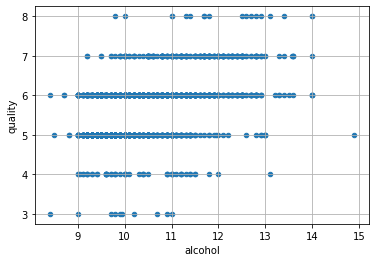

In [6]:
#plotting the alcohol content against quality
data.plot(kind="scatter", x="alcohol", y="quality", grid=True)
plt.show()



## Training the Model

In [39]:
#cost function
def ols_cost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [40]:
#gradient descent
def gradientDescent(X, y, theta, alpha, iters):
    
    # Define the temp matrix for theta
    temp = np.matrix(np.zeros(theta.shape))
    
    # Number of parameters to iterate through
    parameters = int(theta.ravel().shape[1])
    
    # cost vector to see how it progresses through each step
    cost = np.zeros(iters + 1)
    cost[0] = ols_cost(X, y, theta)
    
    # Calculate the error at each step
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i + 1] = ols_cost(X, y, theta)
        
    return theta, cost

## Data Preparation

In [17]:
X = pd.DataFrame(data['alcohol'])
X['x_0'] = 1
y = data['quality']

In [18]:
X = np.matrix(X.values)
y = np.matrix(y.values).T
theta = np.matrix(np.zeros(shape=[1,X.shape[1]]))


In [19]:
print(X.shape, y.shape, theta.shape)

(1599, 2) (1599, 1) (1, 2)


## Compute the cost according to our cost function to see where we're starting with our initial values for  θ .

In [24]:
alpha = 0.01
iters = 1000

In [25]:
theta_final, cost = gradientDescent(X, y, theta, alpha, iters)

In [26]:
#Our final cost is given as:
ols_cost(X, y, theta_final)

0.2660076719790539

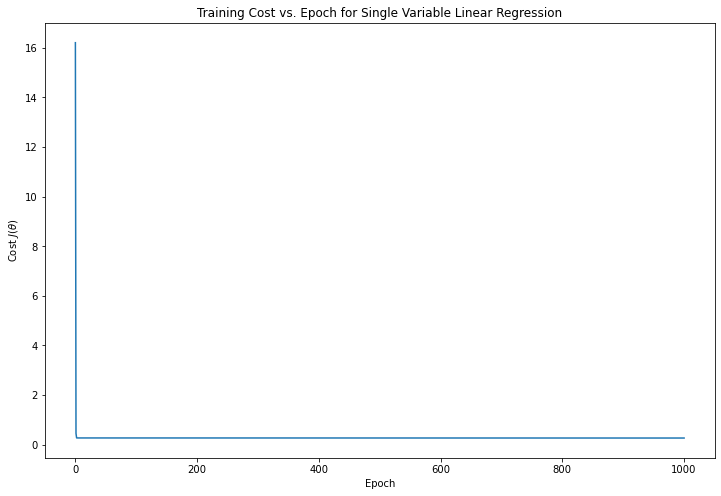

In [27]:
plt.figure(figsize=(12,8))
plt.xlabel("Epoch")
plt.ylabel(r"Cost $J(\theta$)")
plt.plot(cost)
plt.title("Training Cost vs. Epoch for Single Variable Linear Regression")
plt.show()

In [28]:
x = np.linspace(data.alcohol.min(), data.alcohol.max(), 100)
y_hat = theta_final[0,1] + theta_final[0,0] * x 

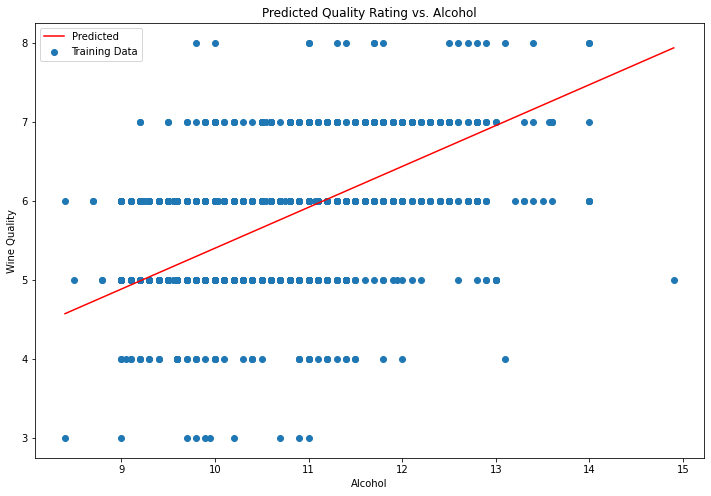

In [29]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, y_hat, 'r', label='Predicted')
ax.scatter(data.alcohol, data.quality, label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Alcohol')
ax.set_ylabel('Wine Quality')
ax.set_title('Predicted Quality Rating vs. Alcohol')
plt.show()

## Linear Regression with Multiple Variables

In [7]:
data_z = (data - data.mean()) / data.std()
data_z.describe()

fixed acidity  volatile acidity   citric acid  residual sugar  \
count   1.599000e+03      1.599000e+03  1.599000e+03    1.599000e+03   
mean   -1.570643e-14     -1.590973e-15  6.045057e-15   -1.344696e-15   
std     1.000000e+00      1.000000e+00  1.000000e+00    1.000000e+00   
min    -2.136377e+00     -2.277567e+00 -1.391037e+00   -1.162333e+00   
25%    -7.004996e-01     -7.696903e-01 -9.290275e-01   -4.530767e-01   
50%    -2.410190e-01     -4.367545e-02 -5.634264e-02   -2.402999e-01   
75%     5.056370e-01      6.264921e-01  7.650078e-01    4.340257e-02   
max     4.353787e+00      5.876138e+00  3.742403e+00    9.192806e+00   

          chlorides  free sulfur dioxide  total sulfur dioxide       density  \
count  1.599000e+03         1.599000e+03          1.599000e+03  1.599000e+03   
mean   5.098590e-15        -7.724347e-17          1.619856e-16  3.772732e-13   
std    1.000000e+00         1.000000e+00          1.000000e+00  1.000000e+00   
min   -1.603443e+00        -1.422055e+00         -1.230199e+00 -3.537625e+00   
25%   -3.711129e-01        -8.484502e-01         -7.438076e-01 -6.075656e-01   
50%   -1.798892e-01        -1.792441e-01         -2.574163e-01  1.759533e-03   
75%    5.382858e-02         4.899619e-01          4.721707e-01  5.766445e-01   
max    1.112355e+01         5.365606e+00          7.372847e+00  3.678904e+00   

                 pH     sulphates       alcohol       quality  
count  1.599000e+03  1.599000e+03  1.599000e+03  1.599000e+03  
mean  -5.937923e-15 -2.175036e-15  2.580411e-14  1.081756e-15  
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  
min   -3.699244e+00 -1.935902e+00 -1.898325e+00 -3.264143e+00  
25%   -6.549356e-01 -6.380200e-01 -8.661079e-01 -7.875763e-01  
50%   -7.210449e-03 -2.250577e-01 -2.092427e-01  4.507074e-01  
75%    5.757422e-01  4.238832e-01  6.352984e-01  4.507074e-01  
max    4.526866e+00  7.916200e+00  4.201138e+00  2.927275e+00

In [8]:
sigma = data.std()
mu = data.mean()
print("Standard Deviations\n", sigma)
print("\nAverages\n", mu)

Standard Deviations
 fixed acidity            1.741096
volatile acidity         0.179060
citric acid              0.194801
residual sugar           1.409928
chlorides                0.047065
free sulfur dioxide     10.460157
total sulfur dioxide    32.895324
density                  0.001887
pH                       0.154386
sulphates                0.169507
alcohol                  1.065668
quality                  0.807569
dtype: float64

Averages
 fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64


## Implementing regression model

In [30]:
# Add the x_0 value
data_z['x_0'] = 1

X = data_z.drop(['quality'], axis=1)
y = data_z['quality']

X = np.matrix(X.values)
y = np.matrix(y.values).T
theta = np.matrix(np.zeros(shape=[1,X.shape[1]]))

In [31]:
theta_final, cost = gradientDescent(X, y, theta, alpha, iters)

In [32]:
for i in range(0, theta_final.shape[1] - 1):
    print(data_z.columns[i], theta_final.T[i])

fixed acidity [[0.07643899]]
volatile acidity [[-0.23250415]]
citric acid [[-0.03256903]]
residual sugar [[0.0379982]]
chlorides [[-0.11097073]]
free sulfur dioxide [[0.05568745]]
total sulfur dioxide [[-0.13376176]]
density [[-0.07123053]]
pH [[-0.0624788]]
sulphates [[0.19712703]]
alcohol [[0.34483693]]


In [33]:
ols_cost(X, y, theta_final)

0.31962101116122116

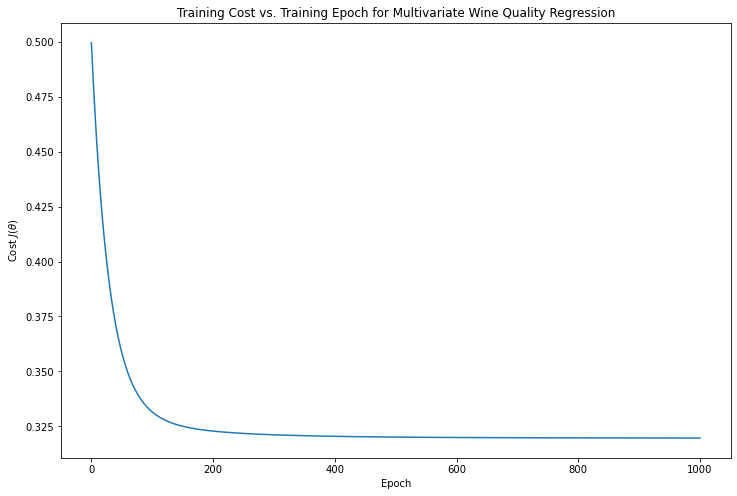

In [34]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlabel("Epoch")
ax.set_ylabel(r"Cost $J(\theta)$")
ax.plot(cost)
ax.set_title("Training Cost vs. Training Epoch for Multivariate Wine Quality Regression")
plt.show()

In [35]:
# x_hat_z is the normalized domain to use for predictions
x_hat_z = np.ones((100, X.shape[1]))
for i in range(1, x_hat_z.shape[1]):
    x_hat_z[:,i] = np.linspace(X[:,i].min(), X[:,i].max(), 100)

# y_hat_z is the normalized, predicted values.
y_hat_z = x_hat_z * theta_final.T

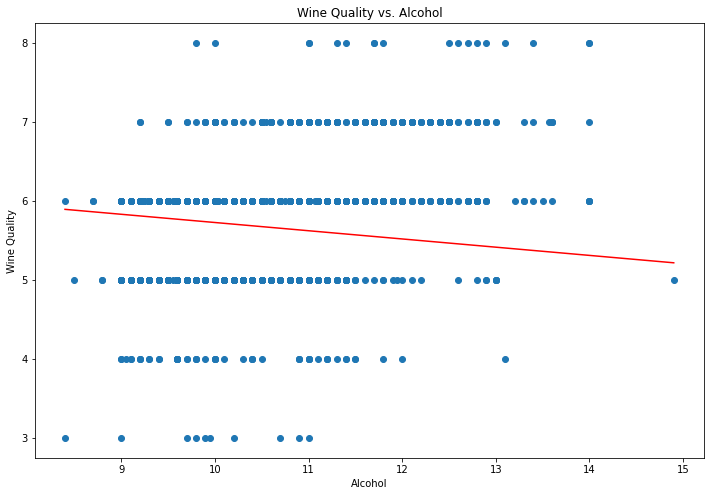

In [36]:
y_hat = y_hat_z * sigma[len(sigma) - 1] + mu[len(mu) - 1]
x_hat = x_hat_z
# First column is intercepts
x_hat[:,0:(len(sigma) - 1)] = x_hat_z[:,0:(len(
            sigma) - 1)] * np.atleast_2d(sigma[0:(
            len(sigma) - 1)]) + np.atleast_2d(mu[0:(
            len(sigma) - 1)])
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x_hat[:,10], y_hat, 'r', label='Predicted')
ax.scatter(data.alcohol, data.quality, label='Training Data')
ax.set_xlabel("Alcohol")
ax.set_ylabel("Wine Quality")
ax.set_title("Wine Quality vs. Alcohol")
plt.show()

In [37]:
# Use training data to calculate R-squared
y_hat_2 = np.ravel(X * theta_final.T * sigma[len(sigma) - 1] + mu[len(mu) - 1])
num = np.sum((data.quality - y_hat_2) ** 2)
den = np.sum((data.quality - data.quality.mean()) ** 2)
r_squared = 1 - num / den
r_squared

0.36035795138073934